## Consumir la API ##

In [11]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df_raw = pd.json_normalize(data)
df_raw.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Inspección inicial ##

In [12]:
df_raw.info()
df_raw.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Limpieza de datos ##

### Normalizar nombres de columnas ###

In [15]:
df = df_raw.copy()

df.columns = (
    df.columns
      .str.lower()
      .str.replace('.', '_')
      .str.replace(' ', '')
)

df.columns


Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

### Convertir variables clave ###

In [16]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')
df['account_charges_monthly'] = pd.to_numeric(df['account_charges_monthly'], errors='coerce')
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')

### Eliminar registros inválidos ###

In [17]:
df = df.dropna(subset=['account_charges_total'])
df.isnull().sum()

,0
customerid,0
churn,224
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


## Guardar dataset limpio ##

In [18]:
df.to_csv("telecomx_clean.csv", index=False)


## Análisis Exploratorio (EDA) ##

### Distribución de churn ###

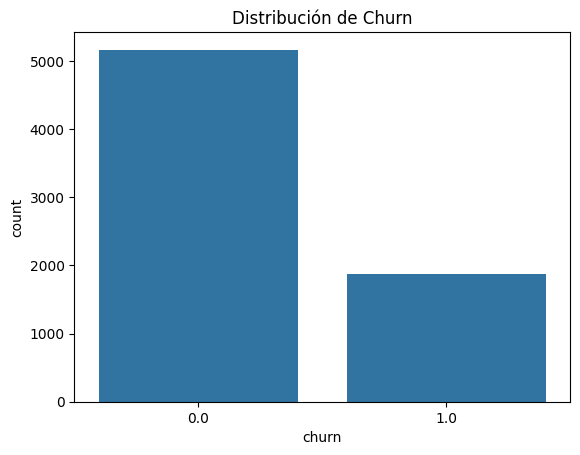

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="churn", data=df)
plt.title("Distribución de Churn")
plt.show()

### Relación entre permanencia y churn ###

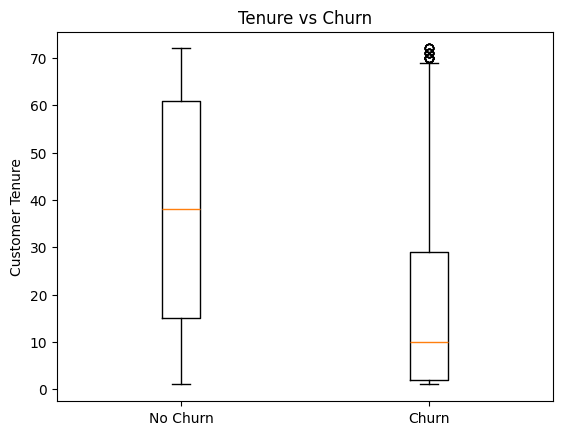

In [20]:
import matplotlib.pyplot as plt

tenure_no = df[df['churn'] == 0]['customer_tenure']
tenure_yes = df[df['churn'] == 1]['customer_tenure']

plt.boxplot([tenure_no, tenure_yes])
plt.xticks([1, 2], ['No Churn', 'Churn'])
plt.title("Tenure vs Churn")
plt.ylabel("Customer Tenure")
plt.show()

### Correlaciones ###

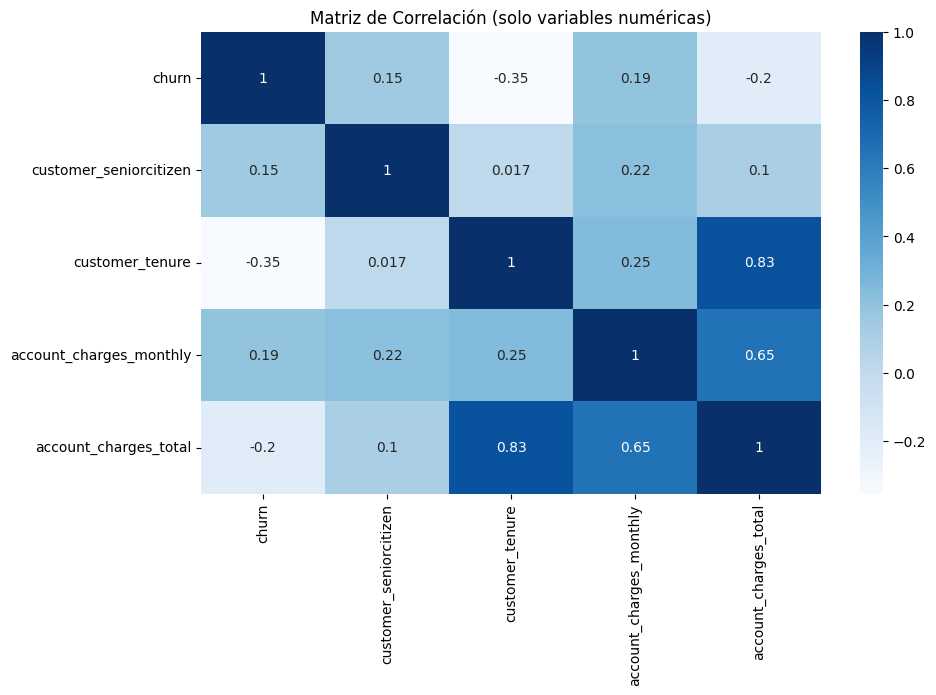

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Matriz de Correlación (solo variables numéricas)")
plt.show()

# 📄Informe final #



# Conclusiones del Análisis de Churn

- Los clientes con menor **tenure** (permanencia) presentan mayor probabilidad de **churn** (cancelación).
- Los clientes con **cargos totales bajos** se asocian con cancelaciones tempranas.
- El **churn** es más alto en clientes con **contratos mensuales**.


# Diccionario de Variables y Relevancia para Churn

| Columna                     | Tipo de Dato | Relevancia para Churn                        | Descripción breve                                   |
|------------------------------|--------------|---------------------------------------------|---------------------------------------------------|
| customerid                   | Object       | Baja                                        | ID único del cliente                               |
| churn                        | Numérico     | Alta                                        | Indica si el cliente canceló (1=Sí, 0=No)       |
| customer_gender              | Categórico   | Media                                       | Género del cliente                                 |
| customer_seniorcitizen       | Numérico     | Media                                       | Si es adulto mayor (1=Sí, 0=No)                 |
| customer_partner             | Categórico   | Media                                       | Si tiene pareja (Yes/No)                         |
| customer_dependents          | Categórico   | Media                                       | Si tiene dependientes (Yes/No)                  |
| customer_tenure              | Numérico     | Alta                                        | Meses que el cliente lleva activo                |
| phone_phoneservice           | Categórico   | Alta                                        | Servicio telefónico contratado (Yes/No)         |
| phone_multiplelines          | Categórico   | Media                                       | Líneas adicionales contratadas                   |
| internet_internetservice     | Categórico   | Alta                                        | Tipo de servicio de internet (DSL/Fibra/Ninguno)|
| internet_onlinesecurity      | Categórico   | Media                                       | Seguridad online contratada (Yes/No)            |
| internet_onlinebackup        | Categórico   | Media                                       | Backup online (Yes/No)                           |
| internet_deviceprotection    | Categórico   | Media                                       | Protección de dispositivos (Yes/No)             |
| internet_techsupport         | Categórico   | Alta                                        | Soporte técnico (Yes/No)                         |
| internet_streamingtv         | Categórico   | Media                                       | Streaming TV (Yes/No)                             |
| internet_streamingmovies     | Categórico   | Media                                       | Streaming Movies (Yes/No)                         |
| account_contract             | Categórico   | Alta                                        | Tipo de contrato (Mensual/Anual/2 años)         |
| account_paperlessbilling     | Categórico   | Media                                       | Facturación sin papel (Yes/No)                  |
| account_paymentmethod        | Categórico   | Media                                       | Método de pago (Tarjeta, Banco, Efectivo, etc.)|
| account_charges_monthly      | Numérico     | Alta                                        | Cargo mensual del cliente                         |
| account_charges_total        | Numérico     | Alta                                        | Cargo total acumulado del cliente                 |


## Calcular cuentas diarias ##

In [22]:
# Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['account_charges_monthly'] / 30

# Verificar los primeros valores
df[['account_charges_monthly', 'Cuentas_Diarias']].head()


,account_charges_monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


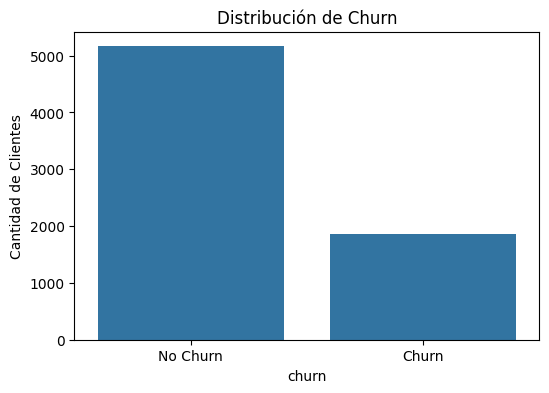

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.title("Distribución de Churn")
plt.ylabel("Cantidad de Clientes")
plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def churn_por_categoria(col):
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f"Churn según {col}")
    plt.ylabel("Cantidad de clientes")
    plt.xlabel(col)
    plt.legend(['No churn', 'Churn'])
    plt.xticks(rotation=30)
    plt.show()


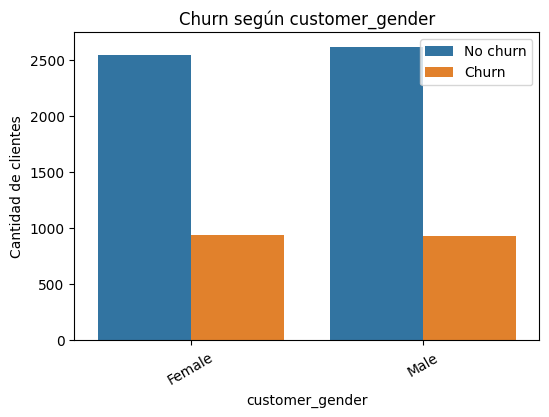

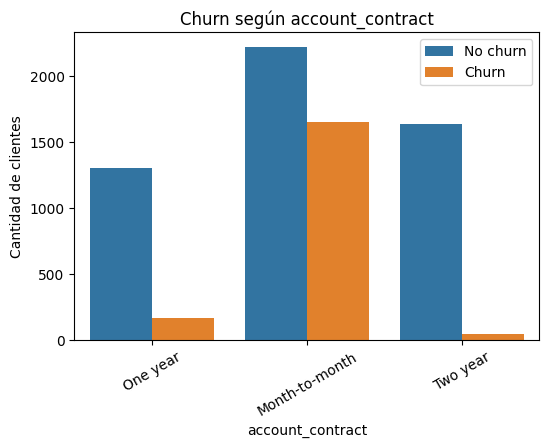

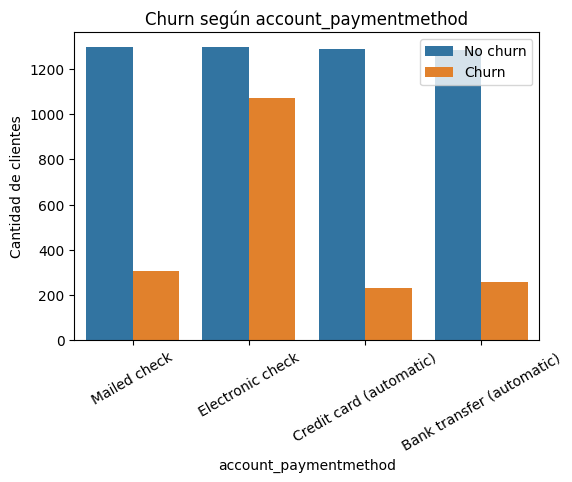

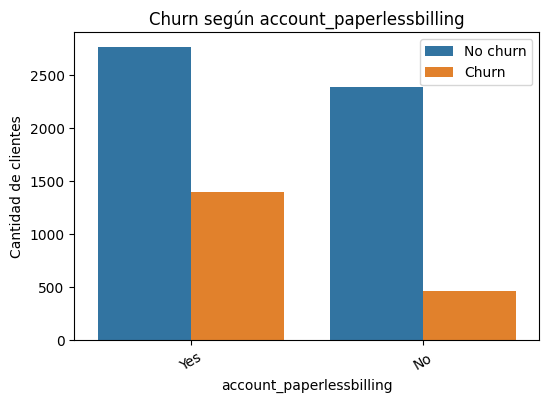

In [26]:
churn_por_categoria('customer_gender')
churn_por_categoria('account_contract')
churn_por_categoria('account_paymentmethod')
churn_por_categoria('account_paperlessbilling')

# 📊 Informe Final – Análisis de Evasión de Clientes (Churn) #

## 🔹 Introducción ##

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en la empresa TelecomX.
El churn representa la pérdida de clientes, lo cual impacta directamente en los ingresos y sostenibilidad del negocio. A través de análisis exploratorio de datos se busca identificar patrones que permitan anticipar cancelaciones y proponer acciones de retención.

## 🔹 Limpieza y Tratamiento de Datos ##

Se realizaron los siguientes pasos:

Importación de datos desde una API en formato JSON.

Normalización de la estructura utilizando pd.json_normalize().

Estandarización de nombres de columnas:

df.columns = df.columns.str.lower().str.replace(" ", "_")

Conversión de variables:

churn: valores Yes/No convertidos a 1/0.

Variables monetarias (account_charges_total, account_charges_monthly) convertidas a tipo numérico con errors='coerce'.

Revisión de valores nulos y tipos de datos mediante:

df.info()
df.isnull().sum()

## 🔹 Análisis Exploratorio de Datos ##

Se exploró la distribución de la variable churn y su relación con distintas variables:

### Distribución de churn ###

Se utilizó un gráfico de barras para visualizar la proporción de clientes que permanecieron y los que cancelaron.

### Churn por variables categóricas ###

Se analizaron variables como:

customer_gender

account_contract

account_paymentmethod

account_paperlessbilling

Mediante gráficos countplot con hue='churn' se observaron diferencias claras entre perfiles de clientes.

### Variables numéricas ###

Se estudió la relación entre:

customer_tenure

account_charges_total

account_charges_monthly

a través de boxplots y matriz de correlación (utilizando solo columnas numéricas).

## 🔹 Conclusiones e Insights ##

Los clientes con menor tenure presentan una mayor probabilidad de churn.

Los clientes con contratos mensuales son los que más cancelan el servicio.

Los cargos totales bajos están asociados con cancelaciones tempranas.

Algunos métodos de pago electrónicos muestran una mayor tasa de evasión.

No se observaron diferencias relevantes de churn entre géneros.

##🔹 Recomendaciones ##

Implementar programas de fidelización durante los primeros meses del cliente.

Incentivar la migración de contratos mensuales a contratos anuales mediante descuentos.

Monitorear de forma temprana a clientes con bajo gasto total.

Diseñar campañas específicas para los métodos de pago con mayor churn.

Desarrollar modelos predictivos de churn para actuar antes de que ocurra la cancelación.

readme = """
# 📊 Análisis de Churn – TelecomX

Este proyecto analiza la evasión de clientes (Churn) de la empresa TelecomX utilizando técnicas de análisis exploratorio de datos.

## 📌 Objetivo
Identificar los factores que influyen en la cancelación del servicio por parte de los clientes y proponer acciones de retención.

## 🧹 Limpieza de Datos
- Normalización de JSON desde API.
- Conversión de variables categóricas y numéricas.
- Eliminación de valores nulos y corrección de formatos.

## 📈 Análisis Realizado
- Distribución de churn.
- Análisis por género, tipo de contrato y método de pago.
- Relación entre churn y cargos / tenure.
- Visualizaciones con Seaborn y Matplotlib.

## 🧠 Conclusiones
- Menor tenure implica mayor probabilidad de churn.
- Los contratos mensuales presentan mayor tasa de cancelación.
- Cargos totales bajos están asociados a churn temprano.

## 🚀 Recomendaciones
- Incentivar contratos anuales.
- Programas de fidelización en los primeros meses.
- Seguimiento temprano de clientes con bajo gasto.

## 🛠 Tecnologías
- Python
- Pandas
- Matplotlib
- Seaborn
- Google Colab
"""

with open("README.md", "w") as f:
    f.write(readme)

print("README.md creado correctamente")
